In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
import glob
import os, re

In [40]:
loss_dir = 'logs/losses'
name = 'STLSTM*'

files = glob.glob(os.path.join(loss_dir, name))
print(files)

['logs/losses/STLSTM_t32_d_3_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_5_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_4_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_6_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_12_ep10_l1.npy', 'logs/losses/STLSTM_t32_d_13_ep10_l1.npy', 'logs/losses/STLSTM_t32_d_19_ep10_l1.npy', 'logs/losses/STLSTM_t32_d_15_ep10_l1.npy', 'logs/losses/STLSTM_t32_d_7_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_16_ep10_l1.npy', 'logs/losses/STLSTM_t32_d_11_ep10_l1.npy', 'logs/losses/STLSTM_t32_d_2_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_0_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_18_ep10_l1.npy', 'logs/losses/STLSTM_t32_d_1_ep14_l1.npy', 'logs/losses/STLSTM_t32_d_8_ep10_l1.npy', 'logs/losses/STLSTM_t32_d_17_ep10_l1.npy']


In [53]:
DF = pd.DataFrame()
depths = []
LOSSES = []
for file in files:
    losses = np.load(file)
    depth = int(re.findall(r'\d+', file)[1])
    depths.append(depth)
    df = pd.DataFrame({'depth':np.repeat(depth,len(losses)), 'loss':losses})
    LOSSES.append(losses)
    DF = DF.append(df)
    #print(depth, np.mean(losses), np.std(losses))
depths.sort()
LOSSES = np.array(LOSSES)

order = [0,1,2,3,4,5,6,7,8,10,12,11,9,14,13,15,16]
depths = np.array(depths)[order]

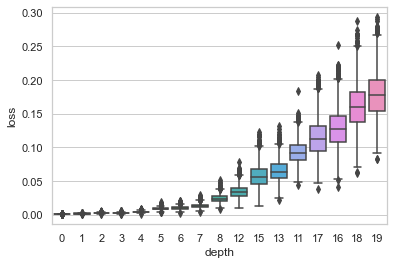

In [49]:
sns.set_theme(style="whitegrid")

ax = sns.boxplot(x="depth", y="loss", data=DF, order=depths)

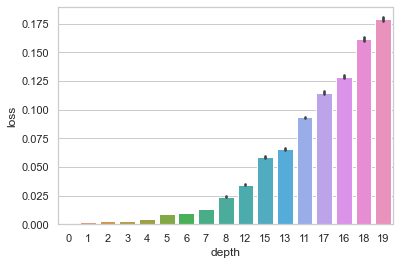

In [50]:
ax = sns.barplot(x="depth", y="loss", data=DF, order=depths)

In [51]:
np.std(losses), np.mean(losses)

(0.027625032, 0.11473382)

In [54]:
LOSSES.shape



(17, 1712)

In [55]:
seb_dir = 'logs/losses/sebastian'

In [60]:
for i, losses in enumerate(LOSSES):
    name = f'STLSTM_l1_t32_d_{i}'
    file = os.path.join(seb_dir, name)
    np.save(file, losses)